In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('data/E Commerce Dataset22.csv')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [24]:
df.info()
df.describe(include='all')
df.isnull().sum()

df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Mobile Phone': 'Mobile'})

# 수치형 - 평균값 대체
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('CustomerID')
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

#범주형 - 최빈값 대체
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# CustomerID 컬럼 삭제
df = df.drop(columns=['CustomerID'])
# Churn - 범주형으로 변경
df['Churn'] = df['Churn'].astype('category')

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,Mobile,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.000000,160
1,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.000000,121
2,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.000000,120
3,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.000000,134
4,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.000000,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.000000,Computer,1,30.0,Credit Card,Male,3.000000,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.000000,151
5626,0,13.000000,Mobile,1,13.0,Credit Card,Male,3.000000,5,Fashion,5,Married,6,0,16.0,1.0,2.0,4.543491,225
5627,0,1.000000,Mobile,1,11.0,Debit Card,Male,3.000000,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.000000,186
5628,0,23.000000,Computer,3,9.0,Credit Card,Male,4.000000,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.000000,179


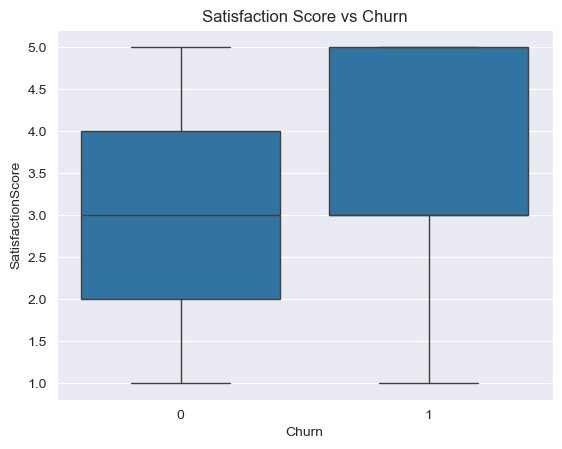

In [25]:
# SatisfationScore
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Churn', y='SatisfactionScore', data=df)
plt.title('Satisfaction Score vs Churn')
plt.show()
# 이탈자 쪽 satisfaction 값의 평균이 낮음 -> 이탈 가능성O

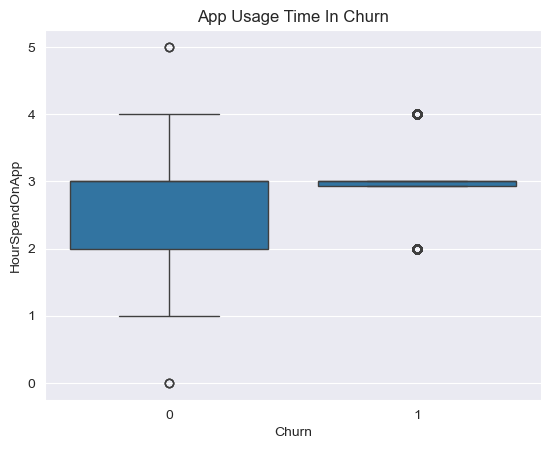

In [26]:
# HourSpendOnApp
sns.boxplot(x='Churn', y='HourSpendOnApp', data=df)
plt.title('App Usage Time In Churn')
plt.show()
# 이탈자 쪽 satisfaction 값의 평균이 낮음 -> 이탈 가능성O

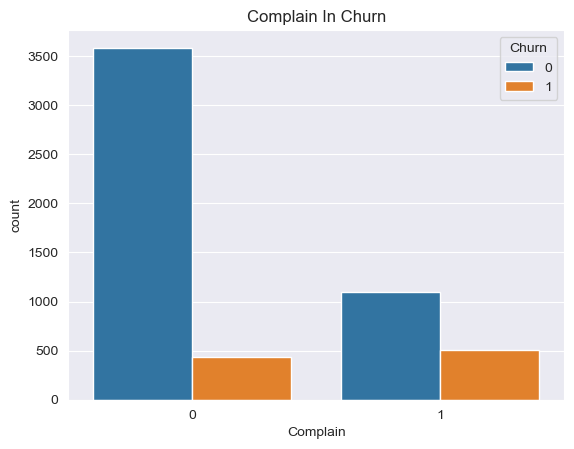

In [27]:
# Complain
pd.crosstab(df['Complain'], df['Churn'], normalize='index')

sns.countplot(x='Complain', hue='Churn', data=df)
plt.title('Complain In Churn')
plt.show()

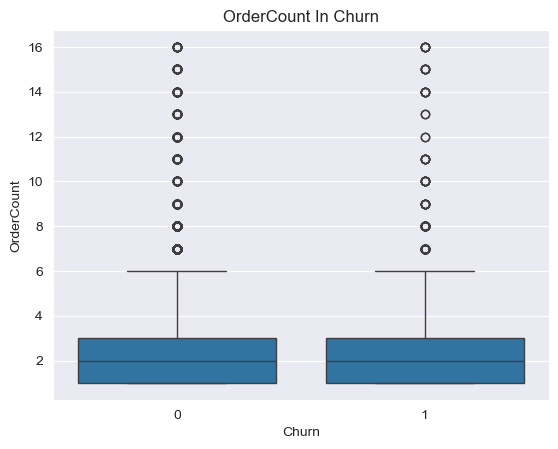

In [28]:
# OrderCount
sns.boxplot(x='Churn', y='OrderCount', data=df)
plt.title('OrderCount In Churn')
plt.show()

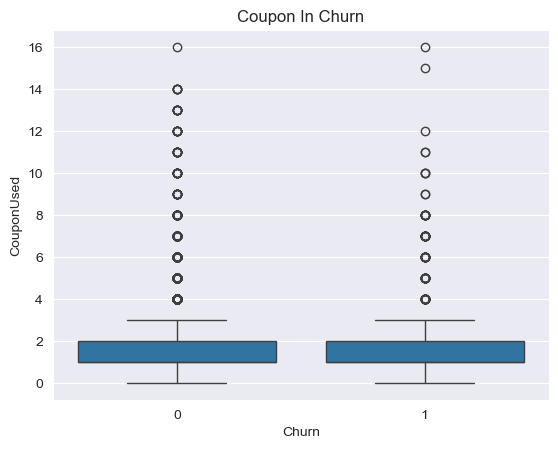

In [29]:
# CouponUsed
sns.boxplot(x='Churn', y='CouponUsed', data=df)
plt.title('Coupon In Churn')
plt.show()

# 가설1: 만족도가 낮을 수록 고객은 이탈할 가능성이 높다.

In [30]:
df.groupby('Churn')['SatisfactionScore'].mean()

C:\Users\koko5\AppData\Local\Temp\ipykernel_32820\617870791.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Churn')['SatisfactionScore'].mean()


Churn
0    3.001282
1    3.390295
Name: SatisfactionScore, dtype: float64

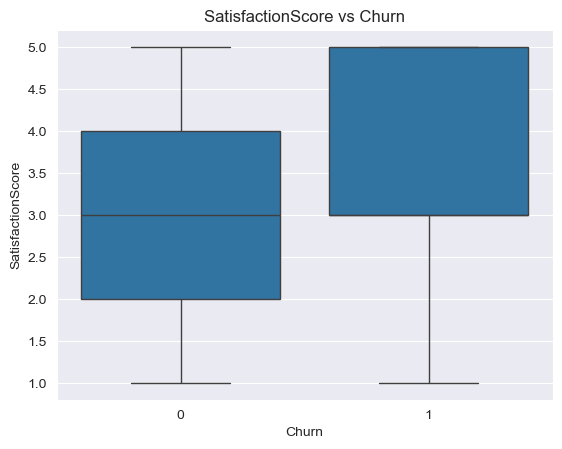

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn', y='SatisfactionScore', data=df)
plt.title('SatisfactionScore vs Churn')
plt.show()


In [32]:
from scipy.stats import ttest_ind

group0 = df[df['Churn'] == 0]['SatisfactionScore']  # 잔존 고객
group1 = df[df['Churn'] == 1]['SatisfactionScore']  # 이탈 고객

t_stat, p_value = ttest_ind(group0, group1, equal_var=False)

print(f"t-statistic = {t_stat:.3f}, p-value = {p_value:.4f}")


t-statistic = -8.101, p-value = 0.0000


### 가설2: 불만을 제기한 고객은 이탈할 가능성이 높다.

In [33]:
pd.crosstab(df['Complain'], df['Churn'], margins=True, normalize='index')


Churn,0,1
Complain,,
0,0.890710,0.109290
1,0.683292,0.316708
All,0.831616,0.168384


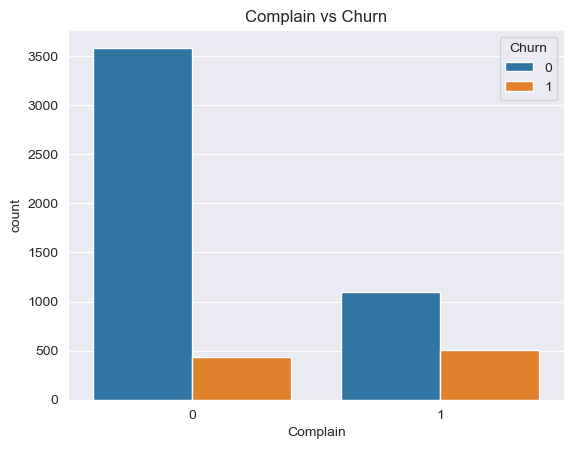

In [34]:
sns.countplot(x='Complain', hue='Churn', data=df)
plt.title('Complain vs Churn')
plt.show()

In [35]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['Complain'], df['Churn'])  # 원본 교차표
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi2 = {chi2:.3f}, p-value = {p:.4f}")


Chi2 = 350.925, p-value = 0.0000


### 가설3: DaySinceLastOrder가 클수록 이탈할 가능성이 높다.

In [36]:
df.groupby('Churn')['DaySinceLastOrder'].mean()

C:\Users\koko5\AppData\Local\Temp\ipykernel_32820\2101739352.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Churn')['DaySinceLastOrder'].mean()


Churn
0    4.793145
1    3.310494
Name: DaySinceLastOrder, dtype: float64

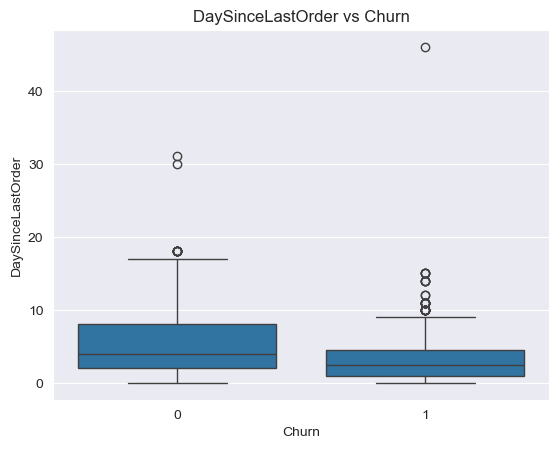

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df)
plt.title('DaySinceLastOrder vs Churn')
plt.show()

In [38]:
from scipy.stats import ttest_ind

group0 = df[df['Churn'] == 0]['DaySinceLastOrder']
group1 = df[df['Churn'] == 1]['DaySinceLastOrder']

t_stat, p_value = ttest_ind(group0, group1, equal_var=False)
print(f"t-statistic = {t_stat:.3f}, p-value = {p_value:.100f}")

t-statistic = 12.363, p-value = 0.0000000000000000000000000000000020537155957126868522407634589695203897334929997856922653747835488145


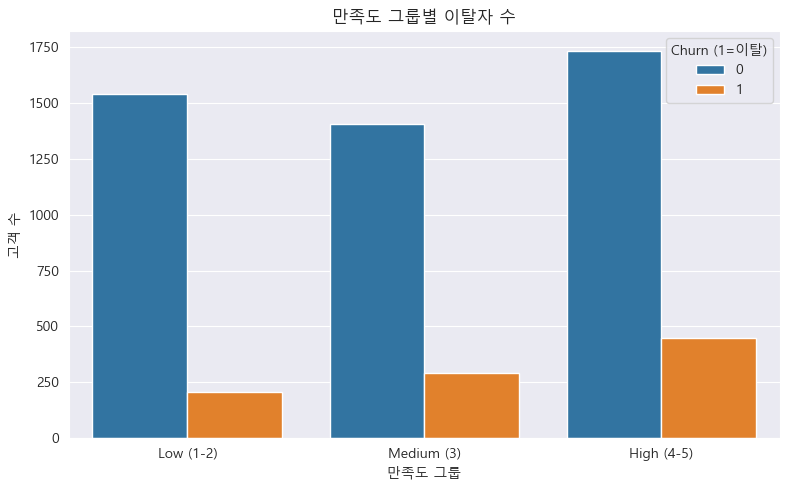

In [39]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 나눔고딕 또는 기본 한글 폰트 경로 지정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows인 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지



# 만족도 그룹 만들기
def satisfaction_group(score):
    if score <= 2:
        return 'Low (1-2)'
    elif score == 3:
        return 'Medium (3)'
    else:
        return 'High (4-5)'

df['SatisfactionGroup'] = df['SatisfactionScore'].apply(satisfaction_group)

# 시각화
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SatisfactionGroup', hue='Churn')
plt.title('만족도 그룹별 이탈자 수')
plt.xlabel('만족도 그룹')
plt.ylabel('고객 수')
plt.legend(title='Churn (1=이탈)')
plt.tight_layout()
plt.show()


C:\Users\koko5\AppData\Local\Temp\ipykernel_32820\4063396240.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['SatisfactionGroup', 'Churn']).size().reset_index(name='count')


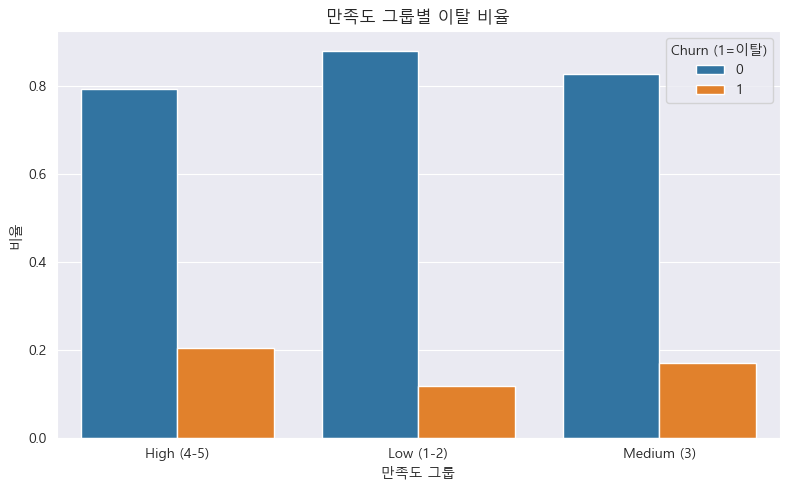

In [40]:
# 그룹별 고객 수 계산
grouped = df.groupby(['SatisfactionGroup', 'Churn']).size().reset_index(name='count')
total_by_group = grouped.groupby('SatisfactionGroup')['count'].transform('sum')
grouped['ratio'] = grouped['count'] / total_by_group

# 비율 막대그래프
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='SatisfactionGroup', y='ratio', hue='Churn')
plt.title('만족도 그룹별 이탈 비율')
plt.xlabel('만족도 그룹')
plt.ylabel('비율')
plt.legend(title='Churn (1=이탈)')
plt.tight_layout()
plt.show()

In [41]:
# 피벗 테이블 (count 기반)
pivot_table = pd.pivot_table(
    df,
    index='SatisfactionGroup',
    columns='Churn',
    values='Gender',  # 아무 변수로 count 계산
    aggfunc='count',
    fill_value=0,
    margins=True,
    margins_name='총합'
)

print(pivot_table)

Churn                 0    1    총합
SatisfactionGroup                 
High (4-5)         1734  448  2182
Low (1-2)          1542  208  1750
Medium (3)         1406  292  1698
총합                 4682  948  5630


C:\Users\koko5\AppData\Local\Temp\ipykernel_32820\1595063398.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(


In [42]:
# 실제로 세 그룹간의 이탈률이 다른지 검정
from scipy.stats import chi2_contingency

# 교차표 만들기
contingency = pd.crosstab(df['SatisfactionGroup'], df['Churn'])

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi2 통계량: {chi2:.3f}")
print(f"p-value: {p:.6f}")
print(f"자유도: {dof}")

Chi2 통계량: 52.064
p-value: 0.000000
자유도: 2
